In [2]:
import wfdb
from wfdb import processing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.fft import fft, fftfreq
import os
import shutil
import posixpath
import math
data_dir = "../data"

In [8]:
fields_ecg_df = pd.DataFrame()
for i in range(1, 11, 1):
    signals_ecg_i, fields_ecg_i = wfdb.rdsamp(record_name=f'{data_dir}/infant{i}_ecg')
    fields_ecg_i['infant']=i
    fields_ecg_i_df = pd.DataFrame.from_dict(fields_ecg_i, orient='index').T
    fields_ecg_df = pd.concat([fields_ecg_i_df, fields_ecg_df], ignore_index=True)
print("ECG Data EDA")
print(fields_ecg_df)
# fields_ecg_i1
# fields_ecg_i1_df = pd.DataFrame.from_dict(fields_ecg_i1, orient='index').T
# fields_ecg_i1_df
fields_resp_df = pd.DataFrame()
for i in range(1, 11, 1):
    signals_resp_i, fields_resp_i = wfdb.rdsamp(record_name=f'{data_dir}/infant{i}_resp')
    fields_resp_i['infant']=i
    fields_resp_i_df = pd.DataFrame.from_dict(fields_resp_i, orient='index').T
    fields_resp_df = pd.concat([fields_resp_i_df, fields_resp_df], ignore_index=True)
print("Respiratory Data EDA")
print(fields_resp_df)

ECG Data EDA
    fs    sig_len n_sig base_date base_time units sig_name comments infant
0  500   85083254     1      None      None  [mV]      [I]       []     10
1  500  126569088     1      None      None  [mV]     [II]       []      9
2  500   44288000     1      None      None  [mV]     [II]       []      8
3  500   36604500     1      None      None  [mV]     [II]       []      7
4  500   87492197     1      None      None  [mV]     [II]       []      6
5  250   43878723     1      None      None  [mV]    [ECG]       []      5
6  500   84208000     1      None      None  [mV]     [II]       []      4
7  500   78684614     1      None      None  [mV]     [II]       []      3
8  500   78916000     1      None      None  [mV]     [II]       []      2
9  250   41052191     1      None      None  [mV]    [ECG]       []      1
Respiratory Data EDA
    fs   sig_len n_sig base_date base_time units sig_name comments infant
0   50   8508154     1      None      None  [NU]   [RESP]       [] 

In [6]:
signals_ecg_i, fields_ecg_i = wfdb.rdsamp(record_name=f'{data_dir}/infant1_ecg')
print(fields_ecg_i)
fields_ecg_i['infant']=1
print(fields_ecg_i)

{'fs': 250, 'sig_len': 41052191, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['ECG'], 'comments': []}
{'fs': 250, 'sig_len': 41052191, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['ECG'], 'comments': [], 'infant': 1}


In [3]:
infant1_ecg = wfdb.rdrecord(record_name=f'{data_dir}/infant1_ecg')
infant2_ecg = wfdb.rdrecord(record_name=f'{data_dir}/infant2_ecg')
# print(type(ecg_1))
infant1_ecg_df = infant1_ecg.to_dataframe()
infant2_ecg_df = infant2_ecg.to_dataframe()
# print(type(ecg_df_1))
# ecg_df_1

In [8]:
infant1_ecg_df

,ECG
0 days 00:00:00,-0.019984
0 days 00:00:00.004000,-0.019984
0 days 00:00:00.008000,-0.014988
0 days 00:00:00.012000,-0.004996
0 days 00:00:00.016000,-0.004996
...,...
1 days 21:36:48.744000,-0.294757
1 days 21:36:48.748000,-0.338471
1 days 21:36:48.752000,-0.314740
1 days 21:36:48.756000,-0.078685


In [5]:
infant1_ecg_df.describe()

,ECG
count,4.105219e+07
mean,-1.884517e-01
std,2.565324e+00
min,-4.095997e+01
25%,-1.273949e-01
50%,-5.245674e-02
75%,8.742790e-03
max,4.089003e+01


<AxesSubplot: >

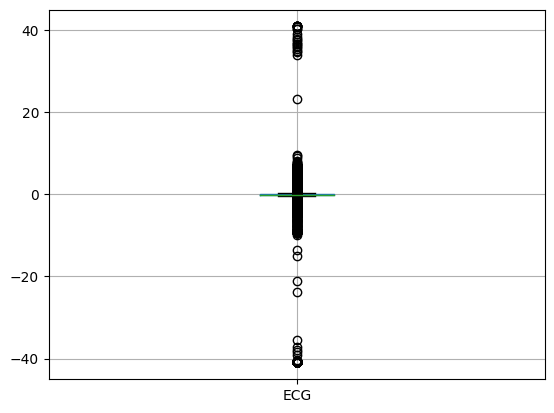

In [6]:
infant1_ecg_df.boxplot()

In [7]:
infant1_ecg_df.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 41052191 entries, 0 days 00:00:00 to 1 days 21:36:48.760000
Freq: 4L
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ECG     float64
dtypes: float64(1)
memory usage: 626.4 MB
